#### Evaluation Project - 1

# Baseball Case Study

##### Problem Statement:
    
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)# Lets now import all the required libraries

In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore,boxcox

In [2]:
# Machine Learning library

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the datafiles and loading the datasets,trying to understand the data.

df=pd.read_csv('baseball.csv') 
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

### Description for Dataset

nput features:

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

    R  - Runs
    AB - At Bats
    H  - Hits
    2B - Doubles
    3B - Triples
    HR - Homeruns
    BB - Walks
    SO - Strikeouts
    SB - Stolen Bases
    RA - Run Allowed
    ER - Earned Runs
    ERA - Earned Run Average (ERA)
    CG - Complete games ( referred online)
    SHO - Shutouts
    SV - Saves
    E - Errors
    Output:

Number of predicted wins (W)

    W - Number of predicted wins

In [5]:
#knowing the shape of the datasets
df.shape

(30, 17)

They are 30 rows and 17 columns is their in the dataset

In [6]:
#finding the datatypes of each of the columns.
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### Key observation :

- All value is in numeric only so no need to use label encoder
- 16 integer and 1 float variable present in dataset.
- No categorical value present in dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
# Checking any null value presends in dataset

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present in the dataset.

## Exploratory Data Analysis (EDA)

#### Summary Statistics

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### Key observations:
- In above description some of column having outlier and skewness.we will observe the data using some other techniques.

#### Data Visualization

To check missing values

<AxesSubplot:>

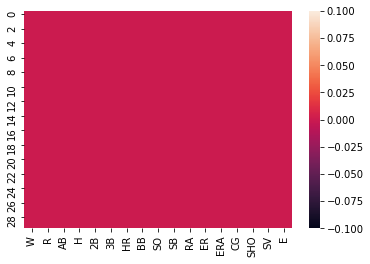

In [10]:
sns.heatmap(df.isnull())

Using Visualizing data plot to re-check null value and heatmap plot is showing their is no null value present in the dataset

### To check Correlation

In [11]:
dfcor=df.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

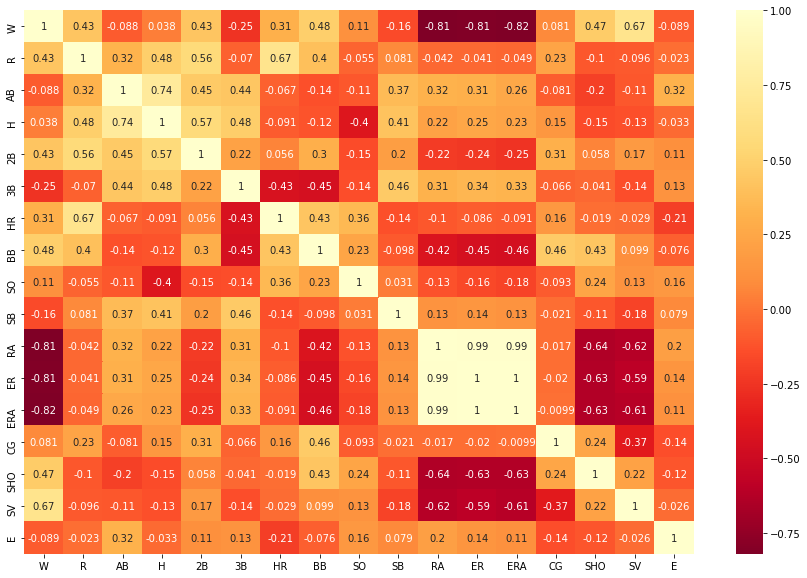

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

#### Key observation :
- RA ,ER,ERA is highly negative correlated with target class.

### Plotting outliers

In [13]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

#### Univariate analysis

<AxesSubplot:>

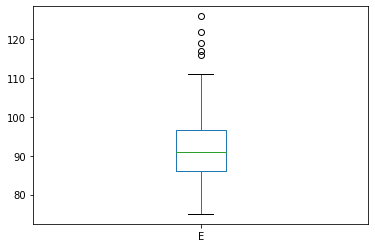

In [14]:
df['E'].plot.box()

<AxesSubplot:>

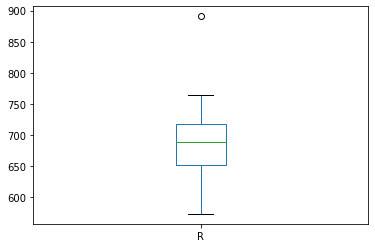

In [15]:
df['R'].plot.box()

<AxesSubplot:>

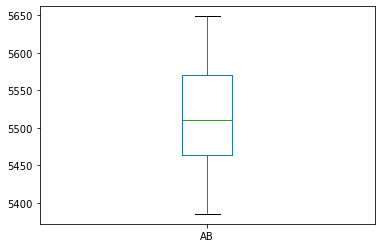

In [16]:
df['AB'].plot.box()

In [17]:
df.shape

(30, 17)

W         AxesSubplot(0.125,0.772143;0.168478x0.107857)
R      AxesSubplot(0.327174,0.772143;0.168478x0.107857)
AB     AxesSubplot(0.529348,0.772143;0.168478x0.107857)
H      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
2B        AxesSubplot(0.125,0.642714;0.168478x0.107857)
3B     AxesSubplot(0.327174,0.642714;0.168478x0.107857)
HR     AxesSubplot(0.529348,0.642714;0.168478x0.107857)
BB     AxesSubplot(0.731522,0.642714;0.168478x0.107857)
SO        AxesSubplot(0.125,0.513286;0.168478x0.107857)
SB     AxesSubplot(0.327174,0.513286;0.168478x0.107857)
RA     AxesSubplot(0.529348,0.513286;0.168478x0.107857)
ER     AxesSubplot(0.731522,0.513286;0.168478x0.107857)
ERA       AxesSubplot(0.125,0.383857;0.168478x0.107857)
CG     AxesSubplot(0.327174,0.383857;0.168478x0.107857)
SHO    AxesSubplot(0.529348,0.383857;0.168478x0.107857)
SV     AxesSubplot(0.731522,0.383857;0.168478x0.107857)
E         AxesSubplot(0.125,0.254429;0.168478x0.107857)
dtype: object

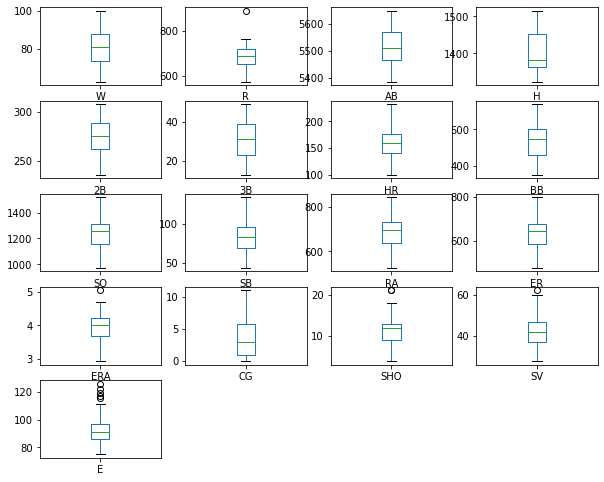

In [18]:
df.plot(kind='box',subplots=True,layout=(6,4),figsize=(10,10))

#### Key observation :
1.Below coulmn having outlier R,ERA,SHO,SV,E

2.Some of the column very near to whisker SV,ERA,SHO

3.Other Column dont have a outlier

### To check distribution of skewness

In [19]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

#### Key observation :
1. As per standard their is some skewness present in R, H, CG, SHO, SV, E
2. We need to handle the skewness
3. Checking distribution plot for more detail.

<AxesSubplot:xlabel='W', ylabel='Density'>

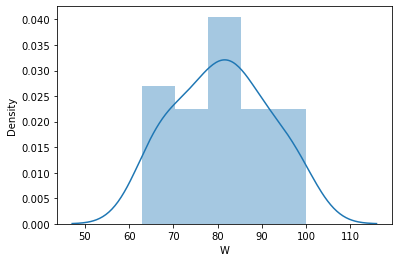

In [20]:
sns.distplot(df['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

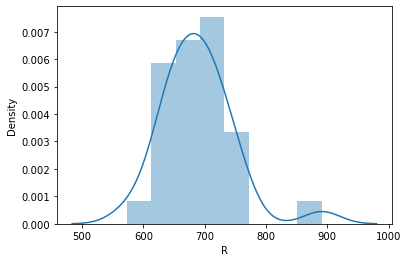

In [21]:
sns.distplot(df['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

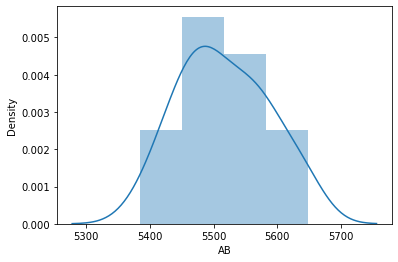

In [22]:
sns.distplot(df['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

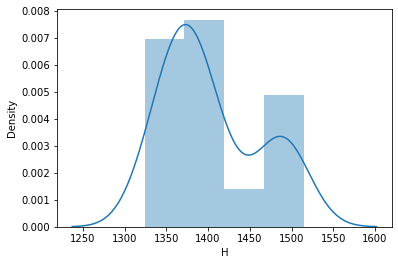

In [23]:
sns.distplot(df['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

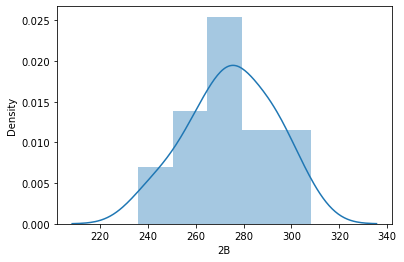

In [24]:
sns.distplot(df['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

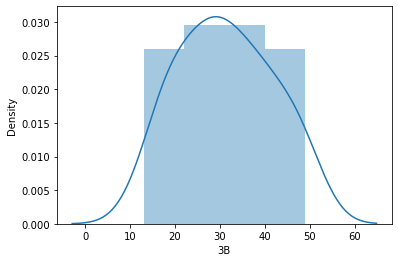

In [25]:
sns.distplot(df['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

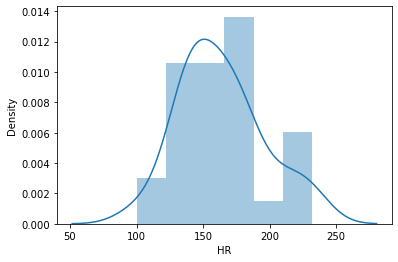

In [26]:
sns.distplot(df['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

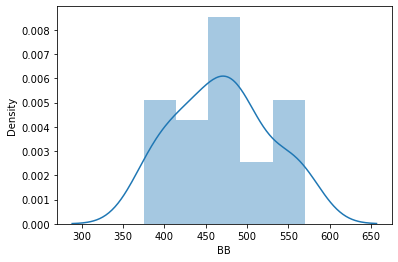

In [27]:
sns.distplot(df['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

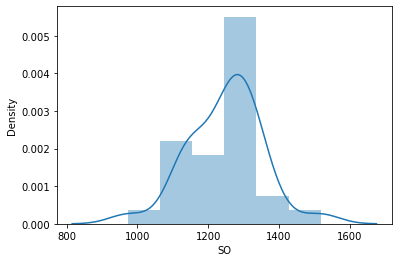

In [28]:
sns.distplot(df['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

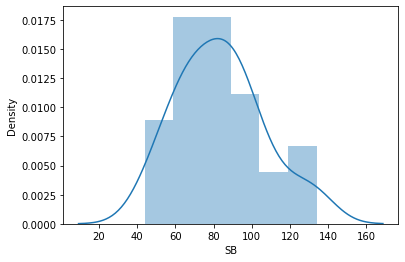

In [29]:
sns.distplot(df['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

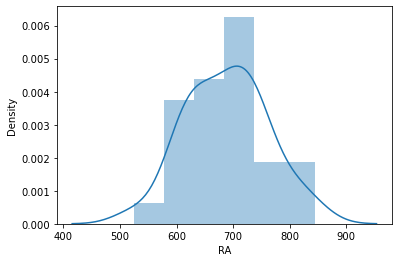

In [30]:
sns.distplot(df['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

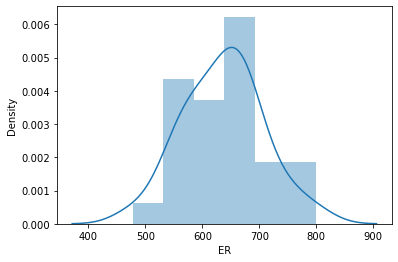

In [31]:
sns.distplot(df['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

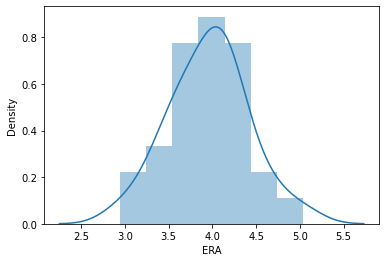

In [32]:
sns.distplot(df['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

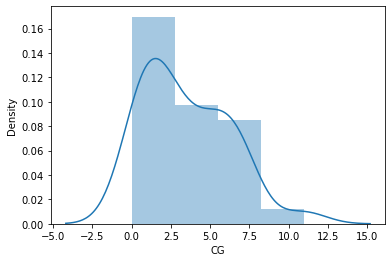

In [33]:
sns.distplot(df['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

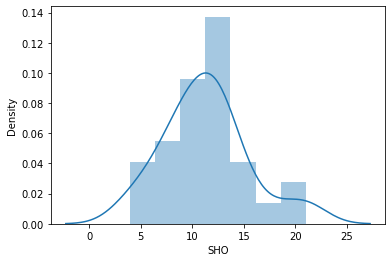

In [34]:
sns.distplot(df['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

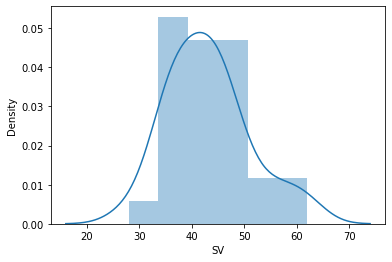

In [35]:
sns.distplot(df['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

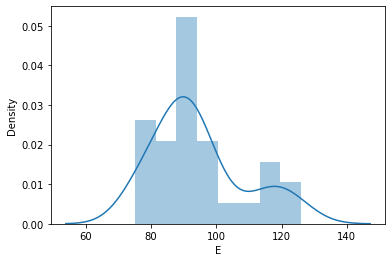

In [36]:
sns.distplot(df['E'])

### Bivariant Analysis

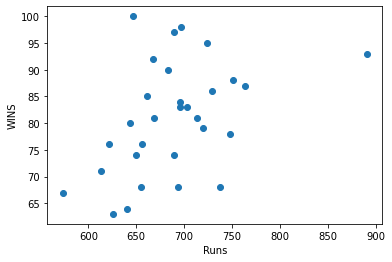

In [37]:
plt.scatter(df.R,df.W)
plt.xlabel("Runs")
plt.ylabel("WINS")
plt.show()

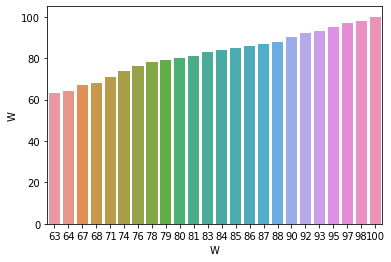

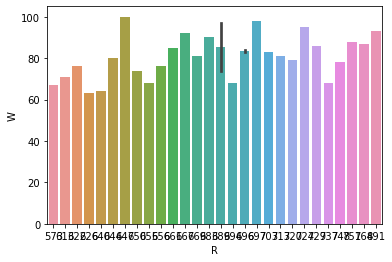

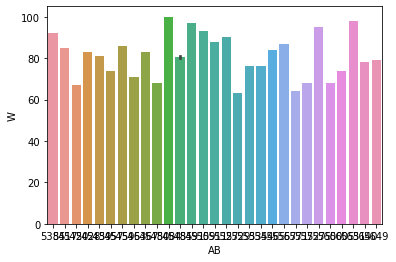

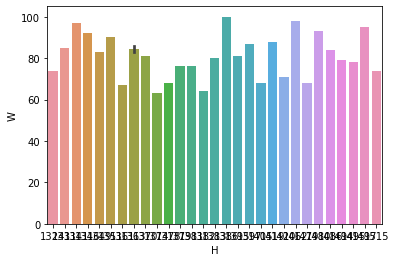

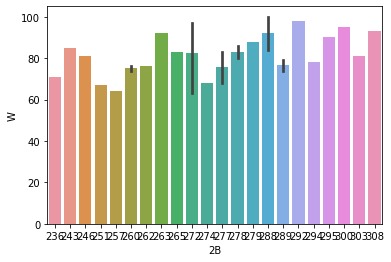

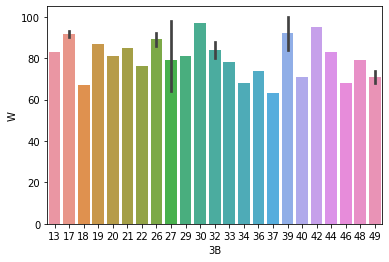

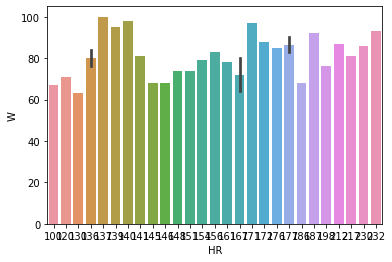

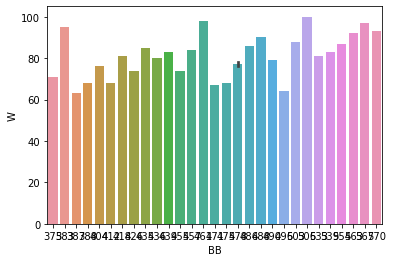

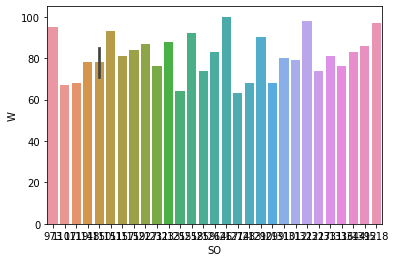

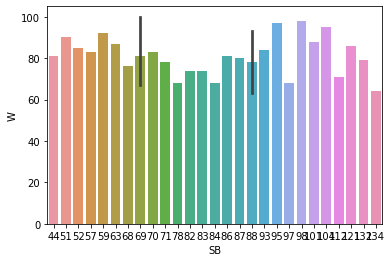

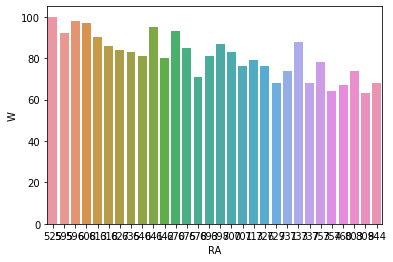

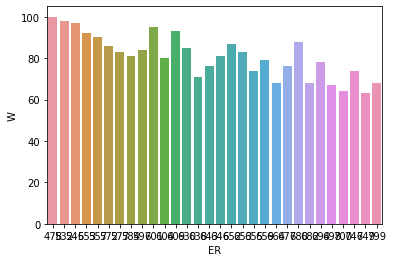

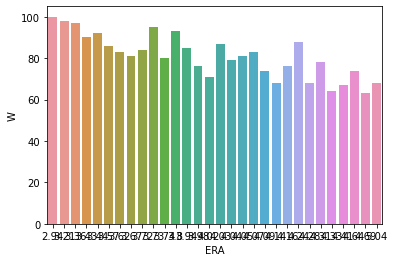

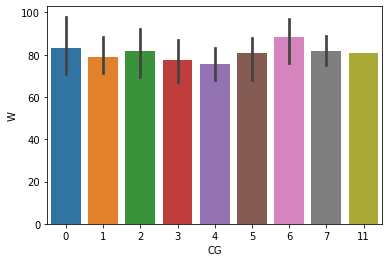

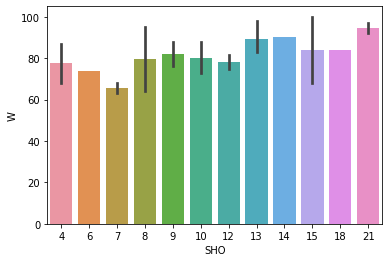

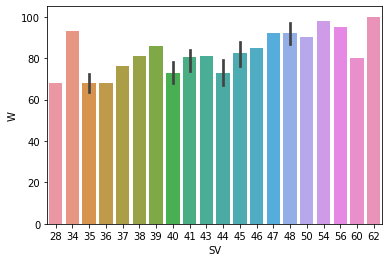

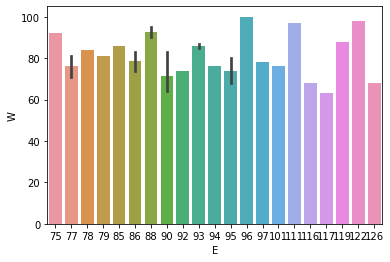

In [38]:
# runs relation with dataset 

for i in df.columns:
    plt.figure()
    sns.barplot(x=df[i],y=df.W)

Relationship between feature and target variable observed

## Removing outlier from Data

In [39]:
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [40]:
df_new = df[(z<3).all(axis=1)]

In [41]:
df.shape

(30, 17)

In [42]:
# Checking shape of new dataset
df_new.shape

(29, 17)

In [43]:
# Data loss

loss_percent=(30-29)/30*100
loss_percent

3.3333333333333335

### Removing negative correlated column

In [44]:
df_new.drop(['RA','ER',],axis=1,inplace=True)

In [45]:
df_new.drop('ERA',axis=1,inplace=True)

In [46]:
x = df_new.iloc[:,1:-1]
y = df_new['W']

In [47]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV
0,724,5575,1497,300,42,139,383,973,104,2,8,56
1,696,5467,1349,277,44,156,439,1264,70,2,12,45
2,669,5439,1395,303,29,141,533,1157,86,11,10,38
3,622,5533,1381,260,27,136,404,1231,68,7,9,37
4,689,5605,1515,289,49,151,455,1259,83,7,12,35
6,764,5567,1397,272,19,212,554,1227,63,3,4,48
7,713,5485,1370,246,20,217,418,1331,44,0,10,43
8,644,5485,1383,278,32,167,436,1310,87,1,12,60
9,748,5640,1495,294,33,161,478,1148,71,3,10,40
10,751,5511,1419,279,32,172,503,1233,101,5,9,45


In [48]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

### Transforming Data to Remove Skewness:

In [49]:
df_x = power_transform(x)
df_x = pd.DataFrame(df_x)
x=df_x

In [50]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.307098,-0.787002,1.532753
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,-0.307098,0.236737,0.312020
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,2.011315,-0.252844,-0.664137
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,1.264463,-0.513555,-0.820689
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.264463,0.236737,-1.149165
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.121871,-2.064039,0.677176
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,-1.732896,-0.252844,0.052325
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.870682,0.236737,1.908137
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.121871,-0.252844,-0.365006
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.770649,-0.513555,0.312020


In [51]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01],
       [-1.30829774e+00,  0.00000000e+00,  0.00000000e+00,
        -8.37664770e-01, -4.32227907e-01, -8.60039342e-01,
        -1.16272085e+00, -2.30682707e-01, -6.18421529e-01,
         1.26446344e+00, -5.13554932e-01, -8.20688859e-01],
       [ 1.37737301e-01,  0.00000000e+00,  0.0000000

## Splitting the DataFrame:

#### Random State

In [52]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"Best random state :{i} and Train r2 score:{r2_score(y_train,pred_train)}")
    print(f"Best random state :{i} and Test r2 score:{r2_score(y_test,pred_test)}")
    print("")

Best random state :1 and Train r2 score:0.8550783206268826
Best random state :1 and Test r2 score:0.6944530201712398

Best random state :2 and Train r2 score:0.8173961865951549
Best random state :2 and Test r2 score:-0.8302730889884642

Best random state :3 and Train r2 score:0.819905531694192
Best random state :3 and Test r2 score:0.7257992916491394

Best random state :4 and Train r2 score:0.8536067232046677
Best random state :4 and Test r2 score:0.6185081885899691

Best random state :5 and Train r2 score:0.8806333789341637
Best random state :5 and Test r2 score:0.2671195820874025

Best random state :6 and Train r2 score:0.8800922107276877
Best random state :6 and Test r2 score:0.662968895995536

Best random state :7 and Train r2 score:0.8488482103041881
Best random state :7 and Test r2 score:0.385007836129869

Best random state :8 and Train r2 score:0.8368074421041336
Best random state :8 and Test r2 score:0.7888158307008533

Best random state :9 and Train r2 score:0.8917311638958251

Best random state :87 and Train r2 score:0.863487733195145
Best random state :87 and Test r2 score:-0.16547278837729418

Best random state :88 and Train r2 score:0.9475429118596443
Best random state :88 and Test r2 score:-2.2511776528197966

Best random state :89 and Train r2 score:0.8591789211440064
Best random state :89 and Test r2 score:0.6097641626791956

Best random state :90 and Train r2 score:0.8658939087991939
Best random state :90 and Test r2 score:0.4581525944679894

Best random state :91 and Train r2 score:0.9190492185868503
Best random state :91 and Test r2 score:0.29149668214416635

Best random state :92 and Train r2 score:0.9218933139577338
Best random state :92 and Test r2 score:-0.3099011382308272

Best random state :93 and Train r2 score:0.9143576037314244
Best random state :93 and Test r2 score:-1.9595624512009362

Best random state :94 and Train r2 score:0.8534758340216136
Best random state :94 and Test r2 score:0.4293934900803491

Best random state :95 and Train r2 

#### Best random state :23 and Train r2 score:0.8273528079101592
#### Best random state :23 and Test r2 score:0.7812319076407752¶

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=23)

## Linear Regression

In [54]:
lr = LinearRegression()
lr.fit(x_train,y_train)
prec =lr.predict(x_test)

In [55]:
def performance(actual,prec):
    print("error")
    print("Mean absolute error",mean_absolute_error(actual,prec))
    print("mean square error",mean_squared_error(actual,prec))
    print("R2 Score :",r2_score(actual,prec))

In [56]:
performance(y_test,prec)

error
Mean absolute error 4.03176543616171
mean square error 27.986463387272035
R2 Score : 0.8168010720568099


### CROSS Validation

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cross_ls = cross_val_score(LinearRegression(),x,y,cv=10)
cross_ls.mean()

-5.944004960197793

#### Regularation Process

In [60]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [61]:
le =Lasso(alpha=0.0001)
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))

0.8168265237541108


#### Cross Validation

In [62]:
cross_Val = cross_val_score(le,x,y,cv=10)
cross_Val.mean()

-5.943691740647569

In [63]:
# Ridge model
rg =Ridge(alpha=0.0001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.8137232776132801

#### Cross Validation

In [64]:
cross_Val = cross_val_score(rg,x,y,cv=10)
cross_Val.mean()

-5.943965765736463

In [65]:
# Elastic model
el=ElasticNet(alpha=0.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)

0.8137232507356761

In [66]:
cross_Val = cross_val_score(el,x,y,cv=10)
cross_Val.mean()

-5.943337716598094

### Model - Some other model to handle dataset

In [67]:
from sklearn.svm import SVR

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel:
    sr = SVR(kernel=i)
    sr.fit(x_train,y_train)
    print(sr.score(x_train,y_train))
    prec = sr.predict(x_test)
    print("error")
    print("Mean absolute error",mean_absolute_error(y_test,prec))
    print("mean square error",mean_squared_error(y_test,prec))
    cross_Val = cross_val_score(sr,x,y,cv=10)
    print("Cross validation",cross_Val.mean())
    print("")

0.6358537742904089
error
Mean absolute error 4.905212383464165
mean square error 36.60099160443789
Cross validation -7.021812327196168

0.3895161851925393
error
Mean absolute error 9.851454594487656
mean square error 140.93521519982315
Cross validation -5.847696092613177

0.19200226673928955
error
Mean absolute error 9.691732263925418
mean square error 138.04056011158093
Cross validation -6.54114430244923

0.2900438840905165
error
Mean absolute error 8.554165172205888
mean square error 117.30892833172064
Cross validation -4.160333456071724



### Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
# Lasso Regrssion param

param ={'alpha':[0.1,0.01,0.001,0.0001],
       'selection':['cyclic', 'random']}

In [70]:
lasso_hp = GridSearchCV(Lasso(),param,cv=5)
lasso_hp.fit(x_train,y_train)
lasso_hp.best_params_

{'alpha': 0.1, 'selection': 'random'}

In [71]:
# Through alpha value it will be corrected
le =Lasso(alpha=0.1,selection='random')
le.fit(x_train,y_train)
predict = le.predict(x_test)
le.score(x_train,y_train)

print(r2_score(y_test,predict))

0.8265142854627615


In [72]:
# Ridge Regrssion param

param_r ={'alpha':[0.1,0.01,0.001,0.0001],
       'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [73]:
ridge_hp = GridSearchCV(Ridge(),param_r,cv=5)
ridge_hp.fit(x_train,y_train)
ridge_hp.best_params_

{'alpha': 0.1, 'solver': 'saga'}

In [74]:
# Ridge model
rg =Ridge(alpha=0.1,solver ='saga')
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
predict = rg.predict(x_test)

print(r2_score(y_test,predict))

0.8160048090102369


##### Lasso Regrssion model is giving higher accuracy so we are selecting this model.

### Model Saving:

In [75]:
import joblib
joblib.dump(le,"Base_Ball_wins_prediction.obj")

['Base_Ball_wins_prediction.obj']

In [76]:
#loding model to file

job=joblib.load("Base_Ball_wins_prediction.obj")
job

Lasso(alpha=0.1, selection='random')